In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import random
import numpy as np
import torch
from PIL import Image
from omegaconf import OmegaConf

from efficient_lerf.data.sequence import sequence_to_point_cloud, load_sequence
from efficient_lerf.data.sequence_reader import LERFFrameSequenceReader
from efficient_lerf.quantization_model import load_model, CONFIGS_DIR
from efficient_lerf.utils.visualization import *

In [33]:
name = 'waldo_kitchen'
sequence = load_sequence(f'/home/gtangg12/data/lerf/LERF Datasets/{name}/{name}/sequence')

In [34]:
pc = sequence_to_point_cloud(sequence)

In [ ]:
visualize_point_cloud(pc.points, pc.depths, pc.colors, nsamples=100000)

In [6]:
model = load_model('bouquet', OmegaConf.load(CONFIGS_DIR / 'template.yaml'))

[20:47:53] Auto image downscale factor of 1                                                 ]8;id=534789;file:///home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=76271;file:///home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#484\484]8;;\

            Dataset is overriding orientation method to none                                ]8;id=553186;file:///home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=337965;file:///home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#232\232]8;;\

            Dataset is overriding orientation method to none                                ]8;id=108633;file:///home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=859731;file:///home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#232\232]8;;\

Setting up training dataset...

Caching all 177 images.

Output()

Setting up evaluation dataset...

Caching all 1 images.

Output()

Scales: 100%|██████████| 7/7 [00:00<00:00, 55.47it/s]
/home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/torchmetrics/functional/image/lpips.py:325: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any i

Loading latest checkpoint from load_dir

/home/gtangg12/mambaforge/envs/efficient-lerf/lib/python3.10/site-packages/nerfstudio/utils/eval_utils.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_state = to

✅ Done loading checkpoint from 
/home/gtangg12/efficient-lerf/outputs/bouquet/lerf/2024-11-07_112933/nerfstudio_models/step-000029999.ckpt

/home/gtangg12/efficient-lerf/src/efficient_lerf/data/sequence.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sequence[k] = torch.load(f)


In [11]:
model.exist(['big white crinkly flower'])

defaultdict(<function efficient_lerf.quantization_model.DiscreteFeatureField.exist.<locals>.<lambda>()>,
            {'big white crinkly flower': 0.6718416213989258})

In [ ]:
scores, pc2 = model.exist(['big white crinkly flower'], return_pc=True, threshold=0.5)
print(scores)
visualize_point_cloud(pc2.points, pc2.depths, pc2.colors, nsamples=10000)

In [45]:
outputs = model.render(['big white crinkly flower'], sequence.cameras[0], return_relevancy=True)
# valid = outputs.pop('valid_mask')
# for k, v in outputs.items():
#     print(k, v.shape)
#     visualize_features(v, valid=valid).save(f'{k}.png')

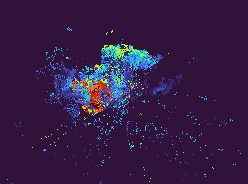

In [52]:
visualize_relevancy(outputs['relevancy'].numpy())